<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/Real_Estate_Price_Prediction_Multivariable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Real_Estate_Price_Prediction_Multivariable_Linear_Regression**
**with SK-Learn**

In [16]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
estate = pd.DataFrame(pd.read_csv("/content/real_estate_price_size_year_view.csv"))
estate.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [18]:
estate.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

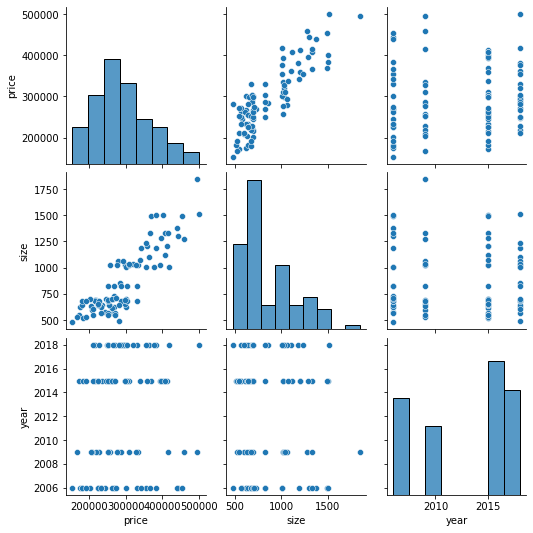

In [20]:
sns.pairplot(estate)
plt.show()

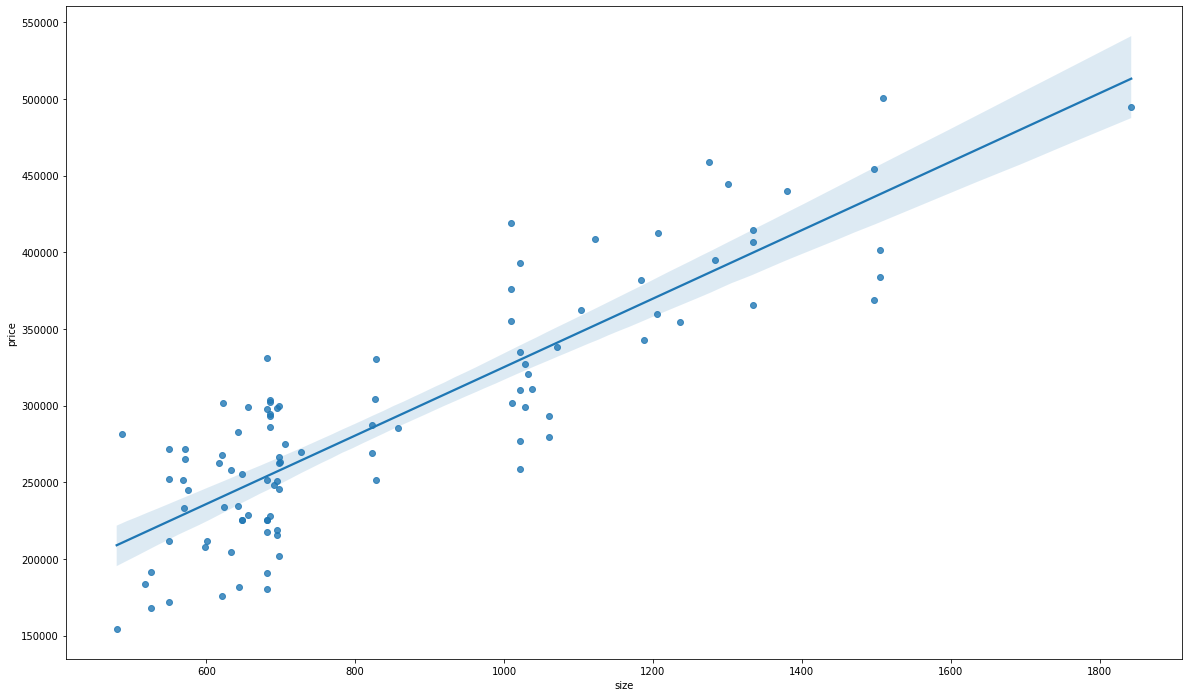

In [21]:
plt.figure(figsize=(20, 12))
sns.regplot(x = 'size', y = 'price', data = estate)
plt.show()

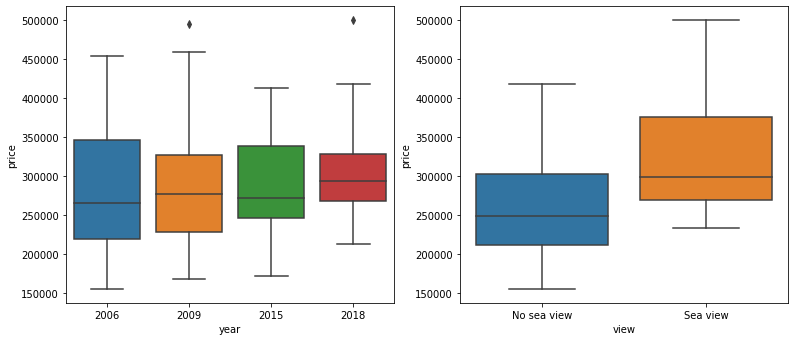

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,2)
sns.boxplot(x = 'year', y = 'price', data = estate)
plt.subplot(2,3,3)
sns.boxplot(x = 'view', y = 'price', data = estate)
plt.show()

In [23]:
estate['view']=estate['view'].map({'No sea view':1,'Sea view':0})
estate.head()

,price,size,year,view
0,234314.144,643.09,2015,1
1,228581.528,656.22,2009,1
2,281626.336,487.29,2018,0
3,401255.608,1504.75,2015,1
4,458674.256,1275.46,2009,0


In [24]:
estate['year'].value_counts()

2015    33
2018    26
2006    24
2009    17
Name: year, dtype: int64

In [25]:
year = pd.get_dummies(estate['year'])
year.head()

,2006,2009,2015,2018
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [26]:
year = pd.get_dummies(estate['year'], drop_first = True)

In [27]:
estate = pd.concat([estate, year], axis = 1)
estate.head()

,price,size,year,view,2009,2015,2018
0,234314.144,643.09,2015,1,0,1,0
1,228581.528,656.22,2009,1,1,0,0
2,281626.336,487.29,2018,0,0,0,1
3,401255.608,1504.75,2015,1,0,1,0
4,458674.256,1275.46,2009,0,1,0,0


In [28]:
estate.drop(['year'], axis = 1, inplace = True)
estate.head()

,price,size,view,2009,2015,2018
0,234314.144,643.09,1,0,1,0
1,228581.528,656.22,1,1,0,0
2,281626.336,487.29,0,0,0,1
3,401255.608,1504.75,1,0,1,0
4,458674.256,1275.46,0,1,0,0


In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(estate, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [34]:
num_vars = ['size','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,price,size,view,2009,2015,2018
32,0.119335,0.108277,1,1,0,0
6,0.291858,0.081836,0,0,1,0
3,0.701096,0.995996,1,0,1,0
12,0.142574,0.202858,1,0,1,0
51,0.676487,0.523381,0,0,1,0


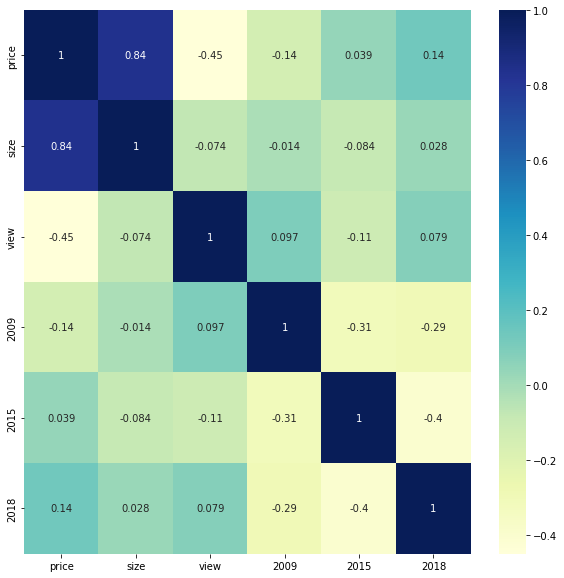

In [36]:
plt.figure(figsize=[10,10])
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

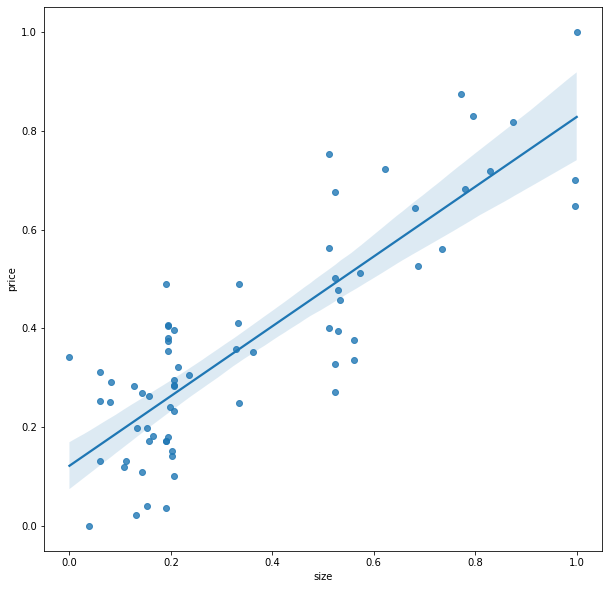

In [37]:
plt.figure(figsize=[10,10])
sns.regplot(x = 'size', y = 'price', data = df_train)
plt.show()

In [38]:
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
#link
#https://www.kaggle.com/gauravduttakiit/real-estate-price-prediction-multiplear-regression/notebook